In [11]:
import numpy as np
from numpy import *

import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt


In [12]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# Print all output

# 1. Data Process

## 1.1 Data Display and Data Visualization

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
df = pd.read_csv('training.csv')
df.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [35]:
df.drop(columns=['split','id'], inplace=True)
# Get rid of two unhelpful variables

1    87.012362
0    12.987638
Name: event, dtype: float64


([<matplotlib.patches.Wedge at 0x1ba05a4aee0>,
 [Text(-0.27097759586537584, 1.2714445102083776, 'Default'),
  Text(0.22928876014480823, -1.0758376571171213, 'Non-Defaults')],
 [Text(-0.16675544360946204, 0.782427390897463, '6.7%'),
  Text(0.12506659644262266, -0.5868205402457025, '93.3%')])

(-1.105593310699271,
 1.1079457833327617,
 -1.1169956225541717,
 1.3057307748804865)

Text(0.5, 1.0, 'Percentage of Defaults and Non-Defaults')

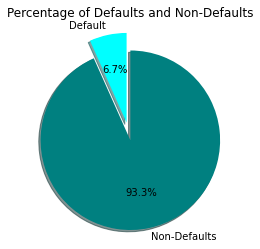

In [404]:
print(df['event'].value_counts()/df.shape[0] *100)

## Pie Chart
labels = 'Default', 'Non-Defaults'
sizes = [6.684, 93.316]
explode = (0.2, 0)
cols    = ['#00FFFF', '#008080']

fig = plt.figure(figsize = (4,4))
plt.pie(sizes, explode=explode, colors = cols, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt. title("Percentage of Defaults and Non-Defaults")
plt.show()

<AxesSubplot:xlabel='event', ylabel='count'>

Proportion of People Who Defaulted: 0.974744175919878


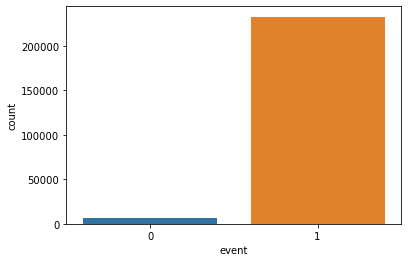

In [114]:
sns.countplot(x="event", data=df)
print("Proportion of People Who Defaulted: {}".format(df["event"].sum() / len(df)))

In [115]:
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(df) })

,Column,Number of Null Values,Proportion
0,event,0,0.000000
1,var1,105800,0.442982
2,var2,121800,0.509973
3,var3,192199,0.804732
4,var4,160649,0.672633
5,var5,230549,0.965303
6,var6,232897,0.975134
7,var7,211294,0.884682
8,var8,137689,0.576500


In [116]:
df.describe()

,event,var1,var2,var3,var4,var5,var6,var7,var8
count,238836.000000,133036.000000,1.170360e+05,46637.000000,78187.000000,8287.000000,5939.000000,27542.000000,101147.000000
mean,0.974744,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
std,0.156901,3.750522,3.444271e+07,125.433035,3.459597,5099.352261,2133.407579,6.460506,11.731754
min,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000,-3127.163978,2.000000,24.416667
25%,1.000000,1.000000,1.102558e+05,0.397341,13.000000,2.341317,0.012441,22.000000,49.833333
50%,1.000000,1.000000,8.042291e+05,1.509004,13.000000,8.105200,0.296218,24.000000,58.666667
75%,1.000000,1.000000,3.247496e+06,6.628049,13.000000,45.835062,1.378717,24.000000,66.666667
max,1.000000,121.000000,2.817428e+09,10175.481564,13.000000,334283.557143,164300.400000,24.000000,118.666667


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var4', ylabel='Density'>

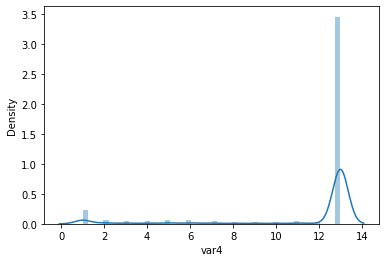

In [117]:
sns.distplot(df["var4"].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var4', ylabel='Density'>

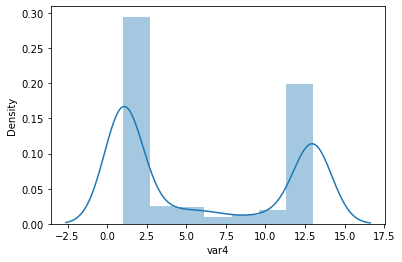

In [118]:
sns.distplot(df.loc[df["event"] == 0]["var4"])

<AxesSubplot:xlabel='var4', ylabel='count'>

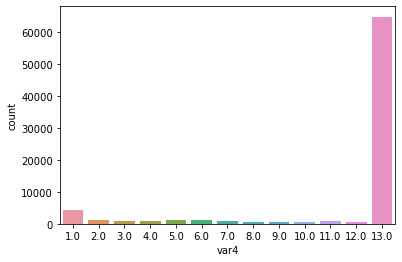

In [119]:
sns.countplot(x="var4", data=df.loc[df["var4"] <= 13])

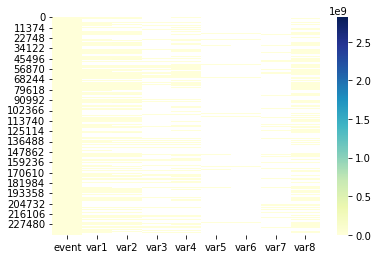

In [120]:
mask = df.isnull()
sns.heatmap(df, mask=mask,cmap="YlGnBu");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


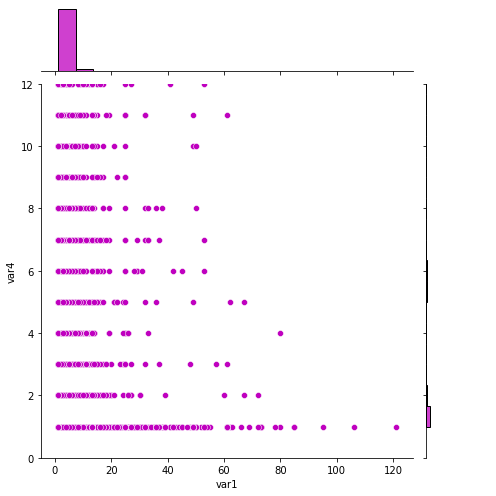

In [121]:
g = sns.jointplot("var1", "var4", data=df, ylim=(0, 12),
                  color="m", height=7)

## 1.2 Data Resampling

In [122]:
df.dropna(axis=0,thresh=3, subset=None, inplace=True)
# Delete rows with fewer than two variables

In [123]:
df.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.750000
6,1,1.0,1.361692e+06,NaN,NaN,NaN,NaN,NaN,65.166667
8,1,1.0,2.268649e+06,NaN,NaN,NaN,NaN,NaN,61.208333
9,1,1.0,2.149415e+03,NaN,13.0,NaN,NaN,NaN,NaN
11,1,2.0,7.522327e+06,1.163336,13.0,NaN,NaN,NaN,45.375000


In [124]:
df = df.drop(df[df.event == 1].sample(frac=0.7).index)
# Randomly drop 70% data with event 1

In [125]:
data_duplication = df.loc[df.event == 0]
df = pd.concat([df, data_duplication], axis=0)
# Use function loc[] to extract the row of event 0 from df and and 
# insert it into the original data

In [126]:
data_duplication.shape
# the number of bad guys after drop 70% good guys

(2968, 9)

In [127]:
df.shape
df.isnull().sum()

(45705, 9)

event        0
var1      2746
var2      6274
var3     30033
var4     20538
var5     43173
var6     43764
var7     36289
var8     14723
dtype: int64

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

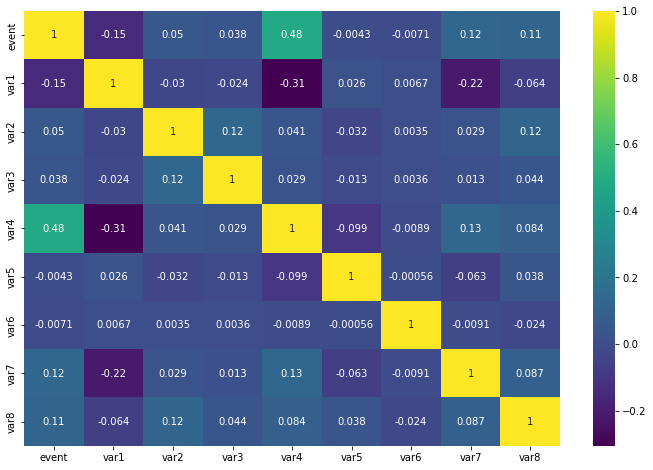

In [128]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [129]:
df.shape
df.isnull().sum()
print("行数：", df.shape[0])
print("列数：", df.shape[1])
counts = df.iloc[:, 0].value_counts()
print("0的个数：", counts[0])
print("1的个数：", counts[1])

(45705, 9)

event        0
var1      2746
var2      6274
var3     30033
var4     20538
var5     43173
var6     43764
var7     36289
var8     14723
dtype: int64

行数： 45705
列数： 9
0的个数： 5936
1的个数： 39769


In [130]:
df.info

<bound method DataFrame.info of         event  var1          var2      var3  var4  var5  var6  var7       var8
8           1   1.0  2.268649e+06       NaN   NaN   NaN   NaN   NaN  61.208333
12          1   1.0  5.661878e+05  0.646621  13.0   NaN   NaN   NaN  53.083333
13          1   1.0  4.655540e+05       NaN   NaN   NaN   NaN   NaN  74.083333
18          1   1.0  8.041781e+05  4.453691  13.0   NaN   NaN  24.0  71.333333
23          1   1.0  1.410384e+06  2.420801  13.0   NaN   NaN   7.0  61.958333
...       ...   ...           ...       ...   ...   ...   ...   ...        ...
238411      0   1.0  3.537968e+04  0.576213  13.0   NaN   NaN   NaN        NaN
238429      0   1.0  1.122663e+04       NaN   NaN   NaN   NaN   NaN        NaN
238436      0   1.0           NaN       NaN   1.0   NaN   NaN   NaN        NaN
238770      0   2.0  7.053483e+05  0.100576  11.0   NaN   NaN   NaN        NaN
238815      0   3.0  6.074078e+05       NaN   5.0   NaN   NaN  24.0  40.666667

[45705 rows x 9 col

## 1.3 Null value processing

### Method 1:Data Binning

pip install pandas==1.1.5 to compatible(兼容) scorecardpy package

In [131]:
print('Box the variables:')
dt = df[['var1', 'var2','var3','var5','var6','var7', 'var4','var8','event']]
bins = sc.woebin(dt ,y='event',positive='bad|0')
# the bad guys'event are 0 

Box the variables:
[INFO] creating woe binning ...


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:113: UserWarning: The positive value in "event" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))
C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:58: UserWarning: There are duplicated index in dataset. The index has been reseted.
  warnings.warn('There are duplicated index in dataset. The index has been reseted.')


{'var8': <Figure size 432x288 with 2 Axes>,
 'var1': <Figure size 432x288 with 2 Axes>,
 'var4': <Figure size 432x288 with 2 Axes>,
 'var5': <Figure size 432x288 with 2 Axes>,
 'var6': <Figure size 432x288 with 2 Axes>,
 'var7': <Figure size 432x288 with 2 Axes>,
 'var3': <Figure size 432x288 with 2 Axes>,
 'var2': <Figure size 432x288 with 2 Axes>}

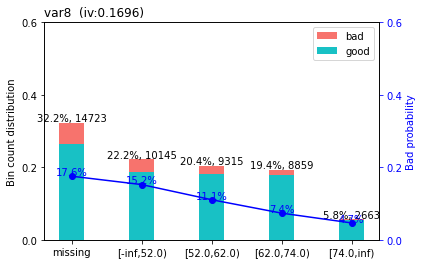

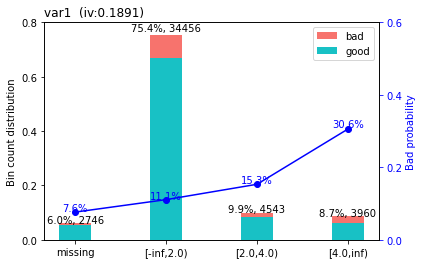

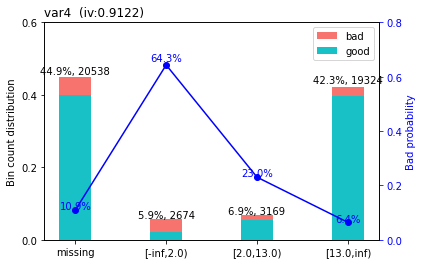

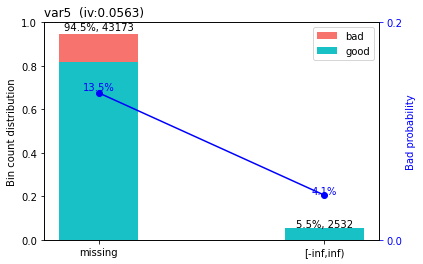

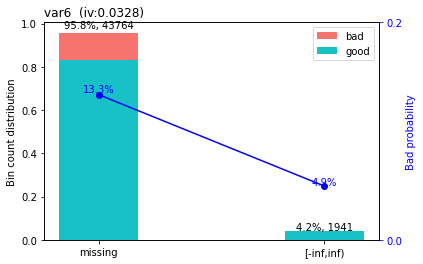

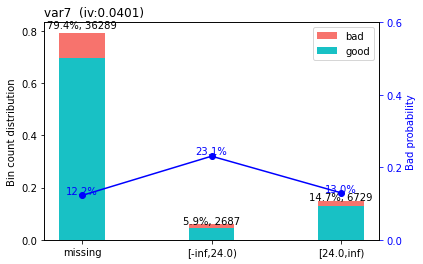

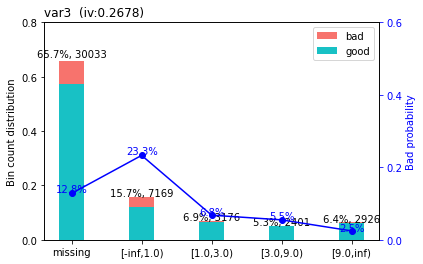

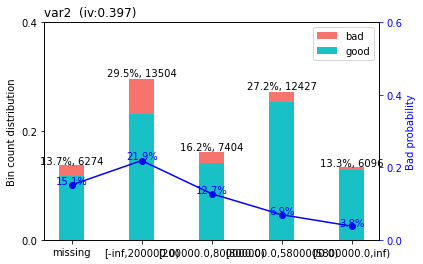

In [132]:
sc.woebin_plot(bins)

In [133]:
print('show iv of each variables:')
iv_stat = pd.DataFrame()
var = []
iv = []
for i,e in bins.items():
    var.append(i)
    iv.append(e['total_iv'].max())
iv_stat['var'] = var
iv_stat['iv'] = iv

iv_stat.sort_values('iv',ascending = False)

show iv of each variables:


,var,iv
2,var4,0.912201
7,var2,0.396976
6,var3,0.267834
1,var1,0.189096
0,var8,0.169628
3,var5,0.056318
5,var7,0.040127
4,var6,0.032790


In [134]:
df = df[['var1', 'var2','var3', 'var4','var8','event']]
# Select variables whose IV value is greater than 0.1
# We tried to increase the variables, but it got worse

In [135]:
bins
#detils of bins

{'var8':   variable          bin  count  count_distr   good   bad   badprob       woe  \
 0     var8      missing  14723     0.322131  12139  2584  0.175508  0.354967   
 1     var8  [-inf,52.0)  10145     0.221967   8599  1546  0.152390  0.186077   
 2     var8  [52.0,62.0)   9315     0.203807   8285  1030  0.110574 -0.182836   
 3     var8  [62.0,74.0)   8859     0.193830   8207   652  0.073597 -0.630646   
 4     var8   [74.0,inf)   2663     0.058265   2539   124  0.046564 -1.117192   
 
      bin_iv  total_iv   breaks  is_special_values  
 0  0.046171  0.169628  missing               True  
 1  0.008229  0.169628     52.0              False  
 2  0.006365  0.169628     62.0              False  
 3  0.060875  0.169628     74.0              False  
 4  0.047988  0.169628      inf              False  ,
 'var1':   variable         bin  count  count_distr   good   bad   badprob       woe  \
 0     var1     missing   2746     0.060081   2536   210  0.076475 -0.589184   
 1     var1  [-in

In [136]:
train_woe = sc.woebin_ply(df, bins)

# Convert the variable into the corresponding WOE value

y_train = train_woe.loc[:,'event']
X_train = train_woe.loc[:,train_woe.columns != 'event']


[INFO] converting into woe values ...


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:58: UserWarning: There are duplicated index in dataset. The index has been reseted.
  warnings.warn('There are duplicated index in dataset. The index has been reseted.')


### Method 2:Fill in empty values with average

In [66]:
df = pd.read_csv('training.csv')
df.head(5)
df.drop(columns=['split','id'], inplace=True)
# Get rid of two unhelpful variables

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [67]:
#fill all null value and show the dataset
df=df.fillna(df.mean())
df

,event,var1,var2,var3,var4,var5,var6,var7,var8
0,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
1,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
2,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
3,1,1.000000,2.096510e+07,16.772031,11.586977,289.199746,28.430493,20.646794,62.750000
4,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
...,...,...,...,...,...,...,...,...,...
238831,1,1.000000,6.523118e+04,16.772031,11.586977,289.199746,28.430493,20.646794,58.916667
238832,1,1.000000,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
238833,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
238834,1,1.000000,8.880325e+05,3.213000,13.000000,289.199746,28.430493,20.646794,63.958333


### Method 3:Fill in empty values with median

In [68]:
df = pd.read_csv('training.csv')
df.head(5)
df.drop(columns=['split','id'], inplace=True)
# Get rid of two unhelpful variables

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [69]:
#fill all null value and show the dataset
df=df.fillna(df.median())
df

,event,var1,var2,var3,var4,var5,var6,var7,var8
0,1,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
1,1,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
2,1,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
3,1,1.0,2.096510e+07,1.509004,13.0,8.1052,0.296218,24.0,62.750000
4,1,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
...,...,...,...,...,...,...,...,...,...
238831,1,1.0,6.523118e+04,1.509004,13.0,8.1052,0.296218,24.0,58.916667
238832,1,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
238833,1,1.0,8.042291e+05,1.509004,13.0,8.1052,0.296218,24.0,58.666667
238834,1,1.0,8.880325e+05,3.213000,13.0,8.1052,0.296218,24.0,63.958333


### Method 4:Fill in empty values with mode

In [104]:
df = pd.read_csv('training.csv')
df.head(5)
df.drop(columns=['split','id'], inplace=True)
# Get rid of two unhelpful variables

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [106]:
#fill all null value and show the dataset
df=df.dropna(axis=1, how='any', thresh=1000, subset=None, inplace=False)
df=df.fillna(df.mode())
df

,event,var1,var2,var3,var4,var5,var6,var8
74,1,1.0,6.613558e+05,0.152680,13.0,9.082821,1.328204,41.500000
583,1,5.0,7.941561e+06,0.035305,13.0,3.870215,0.031024,52.416667
830,1,1.0,4.861405e+05,0.312546,13.0,1106.211765,0.136506,67.583333
1117,1,1.0,4.492599e+06,0.255175,13.0,337.559804,-0.071065,76.000000
1218,1,1.0,1.036874e+05,0.131360,13.0,21.699236,3.557547,37.291667
...,...,...,...,...,...,...,...,...
238700,1,1.0,1.949792e+05,0.007406,13.0,129.572414,-1.924282,63.208333
238730,1,1.0,1.770839e+05,0.000799,13.0,1917.850000,3.303107,70.125000
238742,1,1.0,2.548475e+06,0.659666,13.0,2.141300,0.005080,59.895833
238751,1,1.0,1.850347e+06,0.286215,13.0,1.015538,0.771867,65.875000


### Method 5:Regression imputation

In [107]:
df = pd.read_csv('training.csv')
df.head(5)
df.drop(columns=['split','id'], inplace=True)
# Get rid of two unhelpful variables

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [108]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
imp = IterativeImputer(max_iter=50, random_state=1)
imp.fit(df)  
df

IterativeImputer(max_iter=50, random_state=1)

,event,var1,var2,var3,var4,var5,var6,var7,var8
830,1,1.0,4.861405e+05,0.312546,13.0,1106.211765,0.136506,14.0,67.583333
2185,1,1.0,3.182024e+06,3.419688,13.0,5.308941,1.154519,24.0,59.333333
2265,1,1.0,3.563793e+04,0.005322,13.0,22.608235,1.775113,24.0,65.666667
2409,1,1.0,1.416264e+06,0.072695,13.0,183.520787,-0.365487,24.0,72.000000
2582,1,1.0,6.761754e+05,0.632366,13.0,1.031123,0.095340,24.0,68.895833
...,...,...,...,...,...,...,...,...,...
238324,1,1.0,5.728944e+05,0.067404,13.0,32.733518,4.855479,24.0,42.166667
238426,1,8.0,1.018695e+04,0.001683,1.0,1098.900000,0.661117,24.0,68.916667
238580,1,1.0,1.083489e+06,0.008642,13.0,333.905000,-0.122265,24.0,57.083333
238588,1,1.0,1.850616e+03,0.004344,3.0,644.746667,1.440189,22.0,68.791667


# 2.Model and Algorithm

## 2.1.Logistic Regression

lr is the most common and the easiest to explain, so we'll use lr as well

### 2.1.1 trian

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_range = np.arange(0.001, 0.1, 0.001)

param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__solver': ['lbfgs']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['saga']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['newton-cg']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['sag']},              
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['liblinear']}]

lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
lr = lr.fit(X_train, y_train)
print(lr.best_score_)
print(lr.best_params_)
# adjust parameters

0.8872114648287933
{'logisticregression__C': 0.007, 'logisticregression__solver': 'lbfgs'}


In [155]:
# more precision C 
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_range = np.arange(0.006,0.008,0.0001)

param_grid = [{'logisticregression__C': param_range,
               'logisticregression__solver': ['lbfgs']}]

lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  refit=True,
                  n_jobs=-1)
lr = lr.fit(X_train, y_train)
print(lr.best_score_)
print(lr.best_params_)

0.8872114648287933
{'logisticregression__C': 0.007000000000000003, 'logisticregression__solver': 'lbfgs'}


### 2.1.2. test 

In [36]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667,test,0
1,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,test,1
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000,test,2
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333,test,3
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000,test,4


In [203]:
y_exam = df_test.event

colu_name = ['var1','var2','var3','var4','var8']
x_exam = df_test.loc[:,colu_name]

In [204]:
len(y_exam) - sum(y_exam)
# the number of bad guys in test.csv

1493

In [205]:
# change it to WOE value
x_exam_woe = sc.woebin_ply(x_exam, bins)

[INFO] converting into woe values ...


In [206]:
# predict it
pred_exam = lr.predict(x_exam_woe)

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

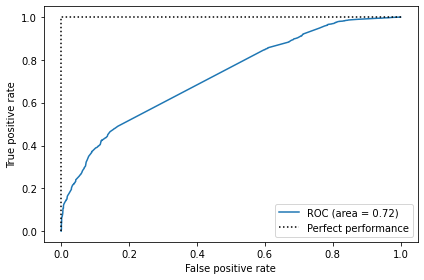

In [161]:
from sklearn.metrics import roc_curve, auc

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


probas = lr.predict_proba(x_exam_woe)

fpr, tpr, thresholds = roc_curve(y_exam,
                                     probas[:, 1],
                                     pos_label=1)
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [163]:
# calculate F1-score
# calculate accuracy
# calculate recall
# calculate precision
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score(y_exam, pred_exam)
accuracy_score(y_exam, pred_exam)
precision_score(y_exam, pred_exam)
recall_score(y_exam, pred_exam)




0.9830001452979035

0.9666884389288047

0.9782427490005954

0.9878040401264258

## 2.2. Random Forest

### 2.2.1. train

In [95]:
train_woe = sc.woebin_ply(df, bins)

# Convert the variable into the corresponding WOE value

y_train = train_woe.loc[:,'event']
X_train = train_woe.loc[:,train_woe.columns != 'event']


[INFO] converting into woe values ...


C:\Users\29128\AppData\Roaming\Python\Python39\site-packages\scorecardpy\condition_fun.py:58: UserWarning: There are duplicated index in dataset. The index has been reseted.
  warnings.warn('There are duplicated index in dataset. The index has been reseted.')


In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
param_grid = {
    'n_estimators': [10,20,50,60,80],
    'max_depth': [1,2,3,4,5,],
}

# 进行网格搜索
cv = KFold(n_splits=5, shuffle=True, random_state=1)
rf = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

In [139]:
print(f"Best f1: {grid_result.best_score_:.4f} with Parameters: {grid_result.best_params_}")

Best f1: 0.9401 with Parameters: {'max_depth': 5, 'n_estimators': 50}


In [179]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=50 , 
                                random_state=1 ,
                                 n_jobs=2, 
                                max_depth=5,min_samples_leaf=4,min_samples_split=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=50,
                       n_jobs=2, random_state=1)

### 2.2.2. test

In [180]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667,test,0
1,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,test,1
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000,test,2
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333,test,3
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000,test,4


In [181]:
y_exam = df_test.event

colu_name = ['var1','var2','var3','var4','var8']
x_exam = df_test.loc[:,colu_name]

In [182]:
len(y_exam) - sum(y_exam)

1493

In [183]:
x_exam_woe = sc.woebin_ply(x_exam, bins)

[INFO] converting into woe values ...


In [184]:
pred_exam = forest.predict(x_exam_woe)

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

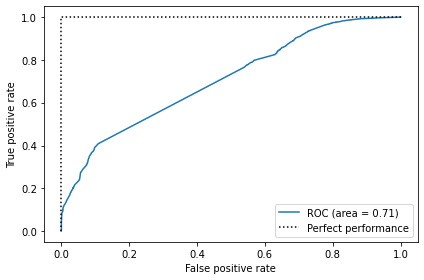

In [185]:
from sklearn.metrics import roc_curve, auc

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


probas = forest.predict_proba(x_exam_woe)

fpr, tpr, thresholds = roc_curve(y_exam,
                                     probas[:, 1],
                                     pos_label=1)
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [186]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score(y_exam, pred_exam)
accuracy_score(y_exam, pred_exam)
precision_score(y_exam, pred_exam)
recall_score(y_exam, pred_exam)

0.9835676340467691

0.9677770520357065

0.9781042976048921

0.9890923457468737

### 2.2.3 Feature importance

In [148]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. var4_woe (0.675976)
2. var2_woe (0.137447)
3. var3_woe (0.079891)
4. var1_woe (0.079370)
5. var8_woe (0.027315)


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x1d41aeed790>,
 [Text(0, 0, 'var4_woe'),
  Text(1, 0, 'var2_woe'),
  Text(2, 0, 'var3_woe'),
  Text(3, 0, 'var1_woe'),
  Text(4, 0, 'var8_woe')])

(-1.0, 5.0)

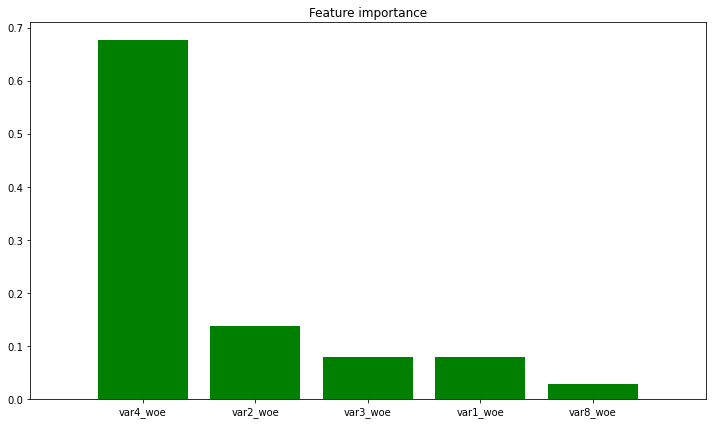

In [149]:
plt.figure(figsize=(10, 6))
plt.title("Feature importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 2.3. XGboost

### 2.3.1 train

In [150]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

parameters = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [10,20,50,100],
}

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = GridSearchCV(xgb_model, parameters, cv=kfold, scoring='f1', n_jobs=2)
clf.fit(X_train, y_train)

print("Best parameters: %s" % clf.best_params_)
print("Best f1: %f" % clf.best_score_)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20}
Best f1: 0.940388


In [235]:
xgb_model = XGBClassifier(objective='binary:logistic',learning_rate= 0.05, max_depth= 5,n_estimators= 20, random_state=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [236]:
importances = xgb_model.get_booster().get_score(importance_type='gain')
importances = {feature: score for feature, score in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
print("Feature ranking:")
for f, imp in enumerate(importances.items()):
    print("%d. %s (%f)" % (f + 1, imp[0], imp[1]))

Feature ranking:
1. var4_woe (557.701416)
2. var2_woe (54.135258)
3. var3_woe (21.400480)
4. var1_woe (16.748735)
5. var8_woe (13.326175)


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x1d41a6fa5b0>,
 [Text(0, 0, 'var4_woe'),
  Text(1, 0, 'var2_woe'),
  Text(2, 0, 'var3_woe'),
  Text(3, 0, 'var1_woe'),
  Text(4, 0, 'var8_woe')])

(-1.0, 5.0)

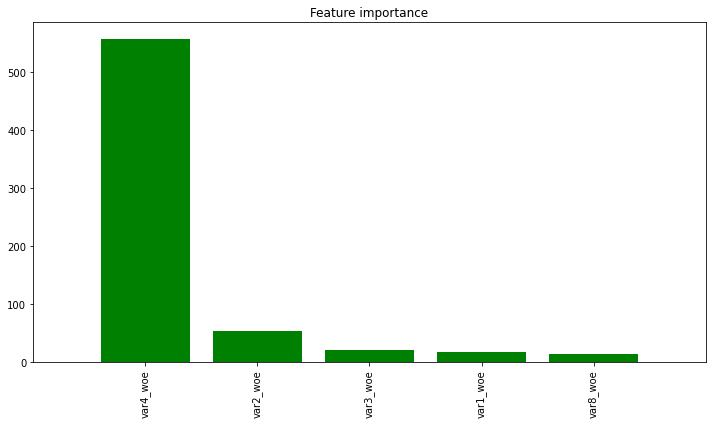

In [237]:
# 可视化各特征重要性排序结果
plt.figure(figsize=(10, 6))
plt.title("Feature importance")
plt.bar(range(len(importances)), list(importances.values()), color="g", align="center")
plt.xticks(range(len(importances)), list(importances.keys()), rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

### 2.3.2 test

In [238]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667,test,0
1,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,test,1
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000,test,2
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333,test,3
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000,test,4


In [239]:
y_exam = df_test.event

colu_name = ['var1','var2','var3','var4','var8']
x_exam = df_test.loc[:,colu_name]

In [240]:
len(y_exam) - sum(y_exam)

1493

In [241]:
x_exam_woe = sc.woebin_ply(x_exam, bins)

[INFO] converting into woe values ...


In [242]:
pred_exam3 =  xgb_model.predict(x_exam_woe)

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

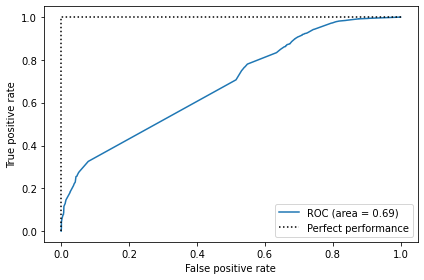

In [243]:
from sklearn.metrics import roc_curve, auc

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


probas = xgb_model.predict_proba(x_exam_woe)

fpr, tpr, thresholds = roc_curve(y_exam,
                                     probas[:, 1],
                                     pos_label=1)
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [244]:
# calculate F1-score
# calculate accuracy
# calculate recall
# calculate precision
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score(y_exam, pred_exam3)
accuracy_score(y_exam, pred_exam3)
precision_score(y_exam, pred_exam3)
recall_score(y_exam, pred_exam3)

0.9840115410552553

0.9686311946272756

0.9780421170521457

0.9900542806101416

## 2.4.Decision Tree

### 2.4.1 train

In [255]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5),
}
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
clftree = GridSearchCV(dt_model, parameters, cv=kfold, scoring='f1', n_jobs=-1)
clftree.fit(X_train, y_train)
print("Best parameters: %s" % clftree.best_params_)
print("Best accuracy: %f" % clftree.best_score_)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='f1')

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy: 0.940280


In [294]:
DecisionTree = DecisionTreeClassifier(criterion='entropy',
                                random_state=1,
                                max_depth=5,
                                min_samples_leaf=1,
                                min_samples_split=2)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

### 2.4.2 test

In [295]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667,test,0
1,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,test,1
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000,test,2
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333,test,3
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000,test,4


In [296]:
y_exam = df_test.event

colu_name = ['var1','var2','var3','var4','var8']
x_exam = df_test.loc[:,colu_name]

In [297]:
len(y_exam) - sum(y_exam)
# the number of bad guys in test.csv

1493

In [298]:
x_exam_woe = sc.woebin_ply(x_exam, bins)

[INFO] converting into woe values ...


In [299]:
pred_exam = DecisionTree.predict(x_exam_woe)

(-0.05, 1.05)

(-0.05, 1.05)

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

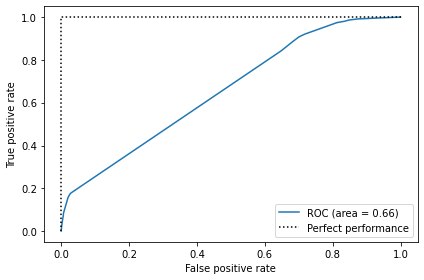

In [300]:
from sklearn.metrics import roc_curve, auc

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []


probas = DecisionTree.predict_proba(x_exam_woe)

fpr, tpr, thresholds = roc_curve(y_exam,
                                     probas[:, 1],
                                     pos_label=1)
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [301]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score(y_exam, pred_exam)
accuracy_score(y_exam, pred_exam)
precision_score(y_exam, pred_exam)
recall_score(y_exam, pred_exam)


0.984377532998302

0.9693346061732737

0.9779442928102803

0.9908959736155009

## 2.5 K-means

### 2.5.1 train

In [16]:
# A utility class to test all of our models on different datasets

from sklearn.model_selection import cross_validate

class Tester():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {} # we added a simple cache to speed things up

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model
        
    def clearModels(self):
        self.models = {}

    def clearCache(self):
        self.cache = {}
    
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[(m_name, df_name, sample_len, cv)]

        clf = self.models[m_name]
        
        if not sample_len: 
            sample = self.datasets[df_name]
        else: sample = self.datasets[df_name].sample(sample_len)
            
        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        s = cross_validate(clf, X, Y, scoring=['roc_auc'], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s

        return s

    def runTests(self, sample_len=80000, cv=5):
        # Tests the added models on all the added datasets
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                # print('Testing %s' % str((m_name, df_name)), end='')
                start = time.time()

                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[(m_name, df_name)] = score
                
                end = time.time()
                
                # print(' -- %0.2fs ' % (end - start))

        print('--- Top 10 Results ---')
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))

            

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import KFold, GridSearchCV
tester = Tester('event')
cv = KFold(n_splits=2, shuffle=True, random_state=1)
tester.addDataset('Drop Missing', df.dropna())
tester.clearModels()

for i in range(5, 10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    tester.addModel('KNN k=%d' % i, neigh)
    
tester.runTests(500)

--- Top 10 Results ---
('KNN k=6', 'Drop Missing') --> AUC: 0.6038 (+/- 0.1989)
('KNN k=9', 'Drop Missing') --> AUC: 0.5922 (+/- 0.1818)
('KNN k=5', 'Drop Missing') --> AUC: 0.5459 (+/- 0.1310)
('KNN k=8', 'Drop Missing') --> AUC: 0.5451 (+/- 0.1238)
('KNN k=7', 'Drop Missing') --> AUC: 0.4337 (+/- 0.0204)


In [375]:
### 2.5.2 test

In [376]:
df_test = pd.read_csv('test.csv')
df_test

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,1.0,9.248254e+07,0.908051,13.0,0.133592,0.027241,NaN,73.041667,test,0
1,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,test,1
2,1,1.0,6.718715e+06,7.035461,13.0,41.878073,-7.422937,NaN,76.250000,test,2
3,1,1.0,3.576348e+06,0.483255,13.0,60.801780,NaN,NaN,80.083333,test,3
4,1,1.0,8.443072e+06,NaN,NaN,0.525225,NaN,NaN,87.625000,test,4
...,...,...,...,...,...,...,...,...,...,...,...
59704,1,1.0,1.060430e+06,NaN,NaN,NaN,NaN,NaN,NaN,test,59704
59705,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,59705
59706,1,1.0,1.593264e+07,NaN,NaN,NaN,NaN,NaN,NaN,test,59706
59707,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,59707


In [377]:

df_test.drop(columns=['split','id'], inplace=True)

colu_name = ['event','var1','var2','var3','var4','var8']
#df_test = df_test.loc[:,colu_name]
#Get rid of two unhelpful variables
#fill all null value and show the dataset

df_test=df_test.fillna(df_test.mean())

df_test

,event,var1,var2,var3,var4,var5,var6,var7,var8
0,1,1.000000,9.248254e+07,0.908051,13.000000,0.133592,0.027241,20.713762,73.041667
1,1,1.879949,6.126271e+06,16.838853,4.000000,301.994295,16.551022,20.713762,58.518438
2,1,1.000000,6.718715e+06,7.035461,13.000000,41.878073,-7.422937,20.713762,76.250000
3,1,1.000000,3.576348e+06,0.483255,13.000000,60.801780,16.551022,20.713762,80.083333
4,1,1.000000,8.443072e+06,16.838853,11.602955,0.525225,16.551022,20.713762,87.625000
...,...,...,...,...,...,...,...,...,...
59704,1,1.000000,1.060430e+06,16.838853,11.602955,301.994295,16.551022,20.713762,58.518438
59705,1,1.879949,6.126271e+06,16.838853,11.602955,301.994295,16.551022,20.713762,58.518438
59706,1,1.000000,1.593264e+07,16.838853,11.602955,301.994295,16.551022,20.713762,58.518438
59707,1,1.879949,6.126271e+06,16.838853,11.602955,301.994295,16.551022,20.713762,58.518438


In [396]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import KFold, GridSearchCV
tester = Tester('event')
cv = KFold(n_splits=2, shuffle=True, random_state=2)
tester.addDataset('test', df_test.dropna())
tester.clearModels()


In [397]:
for i in range(1, 10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    tester.addModel('KNN k=%d' % i, neigh)
    
tester.runTests(310)

--- Top 10 Results ---
('KNN k=7', 'test') --> AUC: 0.7746 (+/- 0.1839)
('KNN k=8', 'test') --> AUC: 0.7173 (+/- 0.1217)
('KNN k=1', 'test') --> AUC: 0.5474 (+/- 0.1117)
('KNN k=3', 'test') --> AUC: 0.5458 (+/- 0.1207)
('KNN k=5', 'test') --> AUC: 0.5188 (+/- 0.1182)
('KNN k=9', 'test') --> AUC: 0.5144 (+/- 0.1747)
('KNN k=2', 'test') --> AUC: 0.4967 (+/- 0.0041)
('KNN k=4', 'test') --> AUC: 0.4820 (+/- 0.1943)
('KNN k=6', 'test') --> AUC: 0.4737 (+/- 0.0159)


In [398]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

f1_score(y_exam, pred_exam)
accuracy_score(y_exam, pred_exam)
precision_score(y_exam, pred_exam)
recall_score(y_exam, pred_exam)

0.9830001452979035

0.9666884389288047

0.9782427490005954

0.9878040401264258

## 2.6 Deep Learning

### 2.6.1 Train

In [73]:
from keras import models
from keras import layers

n_inputs = df.shape[1]

model = models.Sequential()
model.add(layers.Dense(16, activation ='relu', input_shape =(n_inputs, )))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1,activation ='sigmoid'))

In [74]:
model.compile(optimizer = 'rmsprop',
             loss= 'binary_crossentropy',
             metrics = ['accuracy'])

In [75]:
df = pd.read_csv('training.csv')
df.drop(columns=['split','id'], inplace=True)
df_test = pd.read_csv('test.csv')
df_test.drop(columns=['split','id'], inplace=True)
df_test=df_test.fillna(df.mean())
df_test

,event,var1,var2,var3,var4,var5,var6,var7,var8
0,1,1.000000,9.248254e+07,0.908051,13.000000,0.133592,0.027241,20.646794,73.041667
1,1,1.873951,5.989773e+06,16.772031,4.000000,289.199746,28.430493,20.646794,58.497153
2,1,1.000000,6.718715e+06,7.035461,13.000000,41.878073,-7.422937,20.646794,76.250000
3,1,1.000000,3.576348e+06,0.483255,13.000000,60.801780,28.430493,20.646794,80.083333
4,1,1.000000,8.443072e+06,16.772031,11.586977,0.525225,28.430493,20.646794,87.625000
...,...,...,...,...,...,...,...,...,...
59704,1,1.000000,1.060430e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
59705,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
59706,1,1.000000,1.593264e+07,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
59707,1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153


In [83]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 


In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['event'], axis=1), df['event'], test_size=0.2,random_state = 72)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

history = model.fit(X_train_res,
                   y_train_res,
                   epochs=30,
                   batch_size=512,
                   validation_data=(X_test,y_test))

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

### 2.6.2 Test

# 3.Conclusion

In [19]:
Logictic_regresion_metrics = {'f1_score':0.981,'accuracy':0.962 , 'precision':0.979, 'recall':0.983,'roc':0.72}
random_forest_metrics      = {'f1_score':0.984,'accuracy':0.968, 'precision':0.978, 'recall': 0.989,'roc':0.71}
xgboost_metrics            = {'f1_score':0.984,'accuracy':0.969, 'precision':0.978, 'recall': 0.990,'roc':0.69}
decision_tree_metrics      = {'f1_score':0.984,'accuracy':0.969, 'precision':0.978, 'recall': 0.990,'roc':0.66}
K_means                    = {'f1_score':0.983,'accuracy':0.967, 'precision':0.977, 'recall': 0.987,'roc':0.66}

In [21]:
metrics_dict = {
    'Logictic_regresion':Logictic_regresion_metrics,
    'Random_forest': random_forest_metrics,
    'XGboost': xgboost_metrics,
    'Decision_tree':decision_tree_metrics,
    'K_means ':K_means ,
}

metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')

# 输出结果
print(metrics_df)


                    f1_score  accuracy  precision  recall   roc
Logictic_regresion     0.981     0.962      0.979   0.983  0.72
Random_forest          0.984     0.968      0.978   0.989  0.71
XGboost                0.984     0.969      0.978   0.990  0.69
Decision_tree          0.984     0.969      0.978   0.990  0.66
K_means                0.983     0.967      0.977   0.987  0.66
